In [346]:
# Importowanie potrzebnych bibliotek


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

In [347]:
#Wczytywanie pliku 

data = pd.read_csv('HR Employee Attrition.csv')

In [348]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [349]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [350]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## Obejrzenie zawartości danych typu object

In [351]:
data['BusinessTravel'].unique() # usuwamy

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [352]:
data['Department'].unique() # usuwamy

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [353]:
data['EducationField'].unique() # usuwamy

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [354]:
data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [355]:
data['JobRole'].unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [356]:
data['MaritalStatus'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [357]:
data['OverTime'].unique()

array(['Yes', 'No'], dtype=object)

In [358]:
data['Over18'].unique() # usuwamy

array(['Y'], dtype=object)

## usuwanie niepotrzebnych kolumn

In [359]:
data=data.drop(columns=['BusinessTravel','Department','EducationField','Over18', 'EmployeeCount', 'StandardHours'])

In [360]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   DailyRate                 1470 non-null   int64 
 3   DistanceFromHome          1470 non-null   int64 
 4   Education                 1470 non-null   int64 
 5   EmployeeNumber            1470 non-null   int64 
 6   EnvironmentSatisfaction   1470 non-null   int64 
 7   Gender                    1470 non-null   object
 8   HourlyRate                1470 non-null   int64 
 9   JobInvolvement            1470 non-null   int64 
 10  JobLevel                  1470 non-null   int64 
 11  JobRole                   1470 non-null   object
 12  JobSatisfaction           1470 non-null   int64 
 13  MaritalStatus             1470 non-null   object
 14  MonthlyIncome           

In [361]:
set(data['WorkLifeBalance'])

{1, 2, 3, 4}

In [362]:
for x in data:
  print(data[x], data[x].unique())

0       41
1       49
2       37
3       33
4       27
        ..
1465    36
1466    39
1467    27
1468    49
1469    34
Name: Age, Length: 1470, dtype: int64 [41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
0       Yes
1        No
2       Yes
3        No
4        No
       ... 
1465     No
1466     No
1467     No
1468     No
1469     No
Name: Attrition, Length: 1470, dtype: object ['Yes' 'No']
0       1102
1        279
2       1373
3       1392
4        591
        ... 
1465     884
1466     613
1467     155
1468    1023
1469     628
Name: DailyRate, Length: 1470, dtype: int64 [1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  8

## przetwarzanie danych

### rysowanie wykresów 

<ipython-input-363-932cfc458800>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['MonthlyIncome'])


<Axes: xlabel='MonthlyIncome', ylabel='Density'>

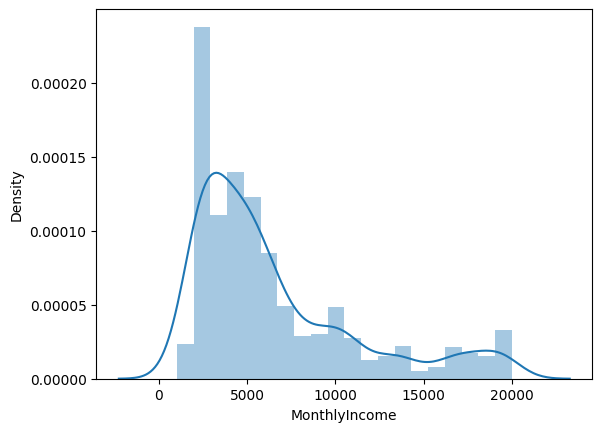

In [363]:
sns.distplot(data['MonthlyIncome'])

<ipython-input-364-45733258958a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['YearsAtCompany'])


<Axes: xlabel='YearsAtCompany', ylabel='Density'>

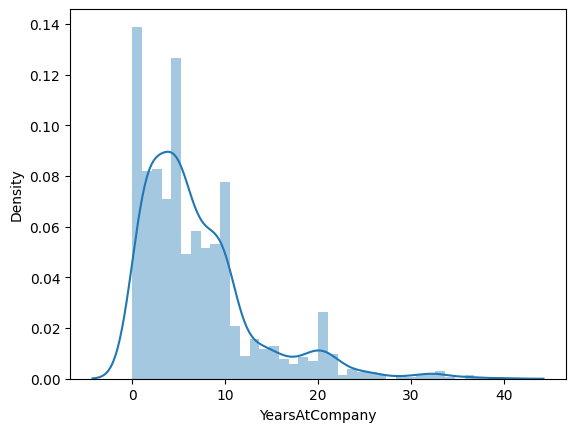

In [364]:
sns.distplot(data['YearsAtCompany'])

### przetwarzanie object na dane liczbowe

In [365]:
# gender, job role, Marital status, overtime

data['Gender']=data['Gender'].astype('category').cat.codes
data['JobRole']=data['JobRole'].astype('category').cat.codes
data['MaritalStatus']=data['MaritalStatus'].astype('category').cat.codes
data['OverTime']=data['OverTime'].astype('category').cat.codes

In [366]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   DailyRate                 1470 non-null   int64 
 3   DistanceFromHome          1470 non-null   int64 
 4   Education                 1470 non-null   int64 
 5   EmployeeNumber            1470 non-null   int64 
 6   EnvironmentSatisfaction   1470 non-null   int64 
 7   Gender                    1470 non-null   int8  
 8   HourlyRate                1470 non-null   int64 
 9   JobInvolvement            1470 non-null   int64 
 10  JobLevel                  1470 non-null   int64 
 11  JobRole                   1470 non-null   int8  
 12  JobSatisfaction           1470 non-null   int64 
 13  MaritalStatus             1470 non-null   int8  
 14  MonthlyIncome           

## Dyksretyzacja danych OverTime

In [367]:
X_kb = data[['OverTime']]

In [368]:
kb = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
kb.fit(X_kb)

KBinsDiscretizer(encode='ordinal', n_bins=10, strategy='uniform')

In [369]:
x_binned = kb.transform(X_kb)
x_binned

array([[9.],
       [0.],
       [9.],
       ...,
       [9.],
       [0.],
       [0.]])

In [370]:
data_disc = pd.DataFrame(x_binned)

In [371]:
data = pd.concat([data, data_disc], axis=1)

In [372]:
data.drop(columns=['OverTime'], inplace=True)

In [373]:
data = data.rename(columns={0:'OverTime'})

## Przypisywanie X i y 


In [374]:
data['JobRole'].unique()

array([7, 6, 2, 4, 0, 3, 8, 5, 1], dtype=int8)

In [375]:

data['Attrition']=data['Attrition'].astype('category').cat.codes
y = data.pop('Attrition')

In [376]:
X = data

# Dane pod modele predykcyjne

In [377]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Balansowanie zbioru

## Oversampling

In [378]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [379]:
over = RandomOverSampler(random_state=123)
X_train_over, y_train_over = over.fit_resample(X_train, y_train)

In [380]:
Counter(y_train_over)

Counter({0: 977, 1: 977})

In [381]:
Counter(y_test)

Counter({1: 38, 0: 256})

## undersampling

In [382]:
from imblearn.under_sampling import RandomUnderSampler

In [383]:
under=RandomUnderSampler(random_state=123)
X_train_under, y_train_under=under.fit_resample(X_train, y_train)

In [384]:
Counter(y_train_under)

Counter({0: 199, 1: 199})

## SMOTE

In [385]:
from imblearn.over_sampling import SMOTE

In [386]:
smote=SMOTE(random_state=123)
X_train_smote, y_train_smote=smote.fit_resample(X_train, y_train)

In [387]:
Counter(y_train_smote)

Counter({0: 977, 1: 977})

# Modele predykcyjne

## Regresja logistyczna

In [388]:
model_log=LogisticRegression()
model_log.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [389]:
y_pred_log = model_log.predict(X_test)

In [390]:
## accuracy score

accuracy_score(y_test, y_pred_log)

0.891156462585034

In [391]:
## classification raport

print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       256
           1       1.00      0.16      0.27        38

    accuracy                           0.89       294
   macro avg       0.94      0.58      0.61       294
weighted avg       0.90      0.89      0.85       294



<Axes: >

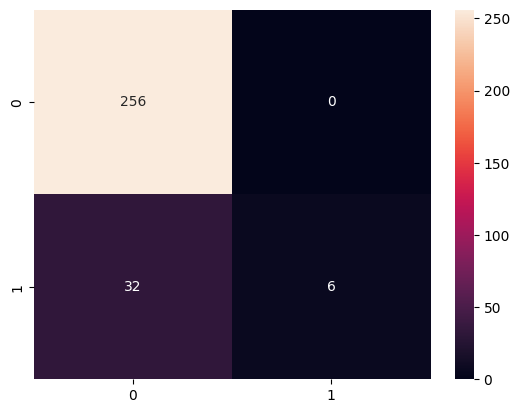

In [392]:
## heatmapa z confusion matrix

cm = confusion_matrix(y_test, y_pred_log)

sns.heatmap(cm, annot=True, fmt='d')

### Oversampling

In [393]:
model_log.fit(X_train_over, y_train_over)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [394]:
y_pred_over = model_log.predict(X_test)

In [395]:
## accuracy score

accuracy_score(y_test, y_pred_over)

0.7448979591836735

In [396]:
## classification raport

print(classification_report(y_test, y_pred_over))

              precision    recall  f1-score   support

           0       0.94      0.75      0.84       256
           1       0.29      0.68      0.41        38

    accuracy                           0.74       294
   macro avg       0.62      0.72      0.62       294
weighted avg       0.86      0.74      0.78       294



<Axes: >

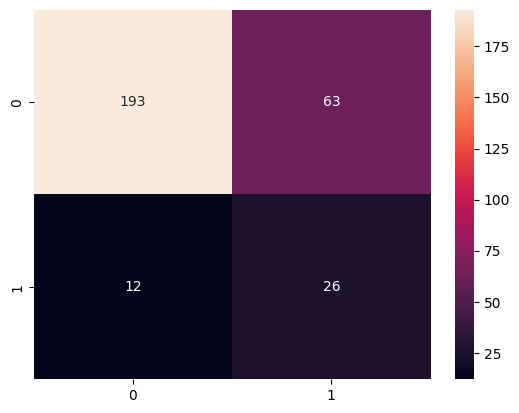

In [397]:
## heatmapa z confusion matrix

cm = confusion_matrix(y_test, y_pred_over)

sns.heatmap(cm, annot=True, fmt='d')

### Undersampling

In [398]:
model_log.fit(X_train_under, y_train_under)
y_pred_under = model_log.predict(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [399]:
## accuracy score

accuracy_score(y_test, y_pred_under)

0.7482993197278912

In [400]:
## classification raport

print(classification_report(y_test, y_pred_under))

              precision    recall  f1-score   support

           0       0.95      0.75      0.84       256
           1       0.30      0.71      0.42        38

    accuracy                           0.75       294
   macro avg       0.62      0.73      0.63       294
weighted avg       0.86      0.75      0.79       294



<Axes: >

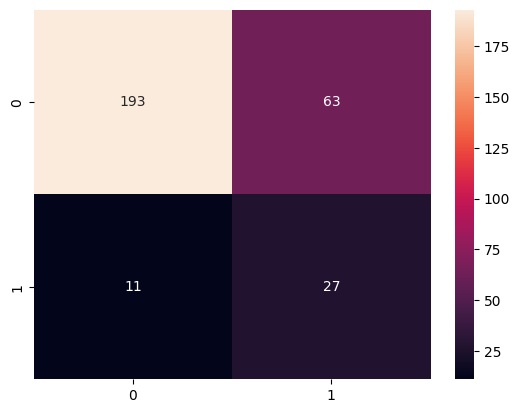

In [401]:
## heatmapa z confusion matrix

cm = confusion_matrix(y_test, y_pred_under)

sns.heatmap(cm, annot=True, fmt='d')

### SMOTE

In [402]:
model_log.fit(X_train_smote, y_train_smote)
y_pred_under = model_log.predict(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [403]:
## accuracy score

accuracy_score(y_test, y_pred_under)

0.7278911564625851

In [404]:
## classification raport

print(classification_report(y_test, y_pred_under))

              precision    recall  f1-score   support

           0       0.94      0.73      0.82       256
           1       0.28      0.71      0.40        38

    accuracy                           0.73       294
   macro avg       0.61      0.72      0.61       294
weighted avg       0.86      0.73      0.77       294



<Axes: >

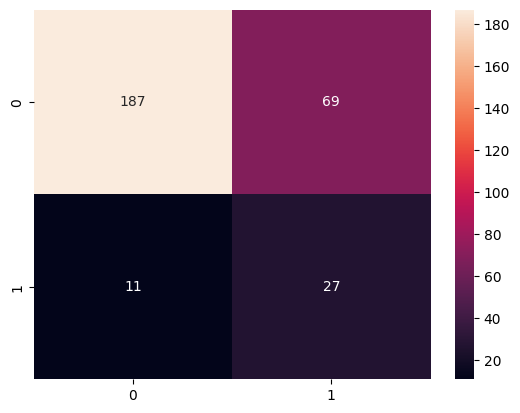

In [405]:
## heatmapa z confusion matrix

cm = confusion_matrix(y_test, y_pred_under)

sns.heatmap(cm, annot=True, fmt='d')

### Classweight

              precision    recall  f1-score   support

           0       0.95      0.77      0.85       256
           1       0.31      0.71      0.43        38

    accuracy                           0.76       294
   macro avg       0.63      0.74      0.64       294
weighted avg       0.86      0.76      0.79       294



/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Axes: >

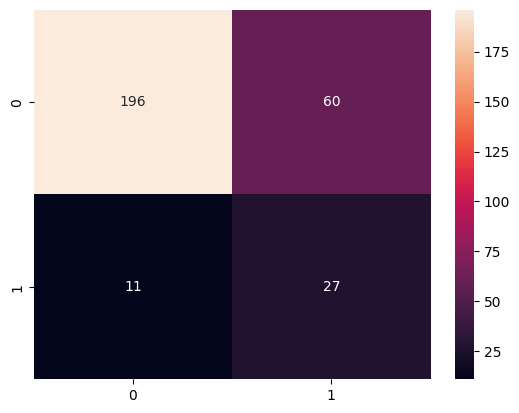

In [406]:

model_log = LogisticRegression(class_weight='balanced')
model_log.fit(X_train, y_train)

y_pred_class = model_log.predict(X_test)

accuracy_score(y_test, y_pred_class)

print(classification_report(y_test, y_pred_class))

cm = confusion_matrix(y_test, y_pred_class)
sns.heatmap(cm, annot=True, fmt='d')

## SVM

In [407]:
# RBF

model_svm_rbf=SVC(kernel='rbf', C=1)
model_svm_rbf.fit(X_train,y_train)

SVC(C=1)

In [408]:
y_pred = model_svm_rbf.predict(X_test)

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       256
           1       0.00      0.00      0.00        38

    accuracy                           0.87       294
   macro avg       0.44      0.50      0.47       294
weighted avg       0.76      0.87      0.81       294



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

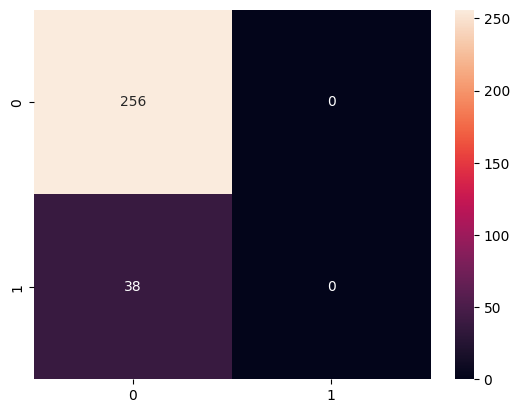

In [409]:
accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

In [410]:
model_svm_poly=SVC(kernel='poly')
model_svm_poly.fit(X_train,y_train)

SVC(kernel='poly')

In [411]:
y_pred = model_svm_poly.predict(X_test)

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       256
           1       0.00      0.00      0.00        38

    accuracy                           0.87       294
   macro avg       0.44      0.50      0.47       294
weighted avg       0.76      0.87      0.81       294



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

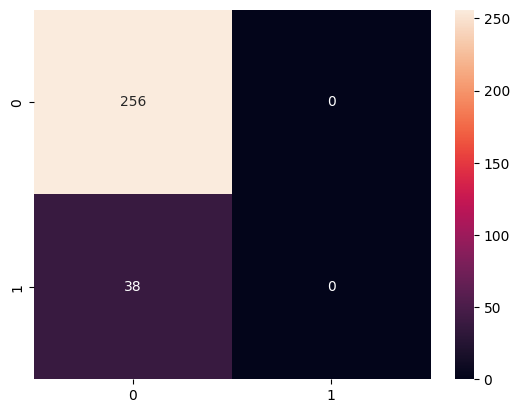

In [412]:
accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

### OverSampling

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       256
           1       0.00      0.00      0.00        38

    accuracy                           0.87       294
   macro avg       0.44      0.50      0.47       294
weighted avg       0.76      0.87      0.81       294



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

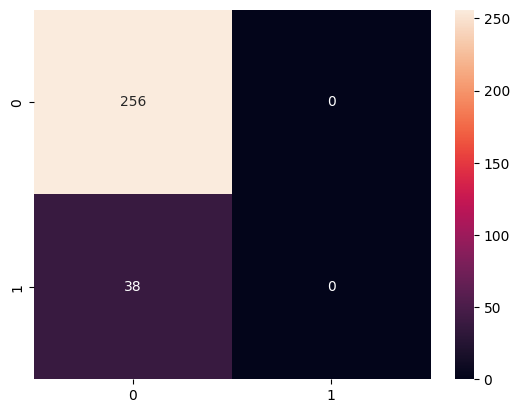

In [413]:
# RBF
model_svm_rbf.fit(X_train_over, y_train_over)

y_pred_over = model_svm_rbf.predict(X_test)

accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       256
           1       0.00      0.00      0.00        38

    accuracy                           0.87       294
   macro avg       0.44      0.50      0.47       294
weighted avg       0.76      0.87      0.81       294



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

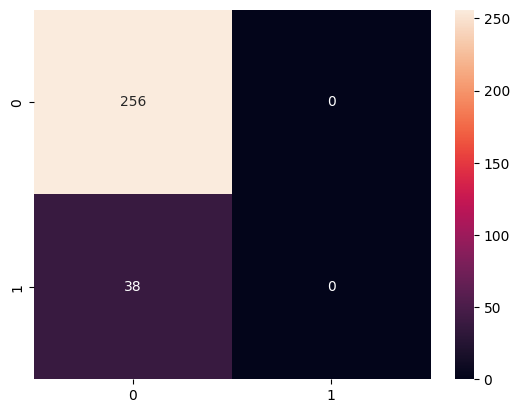

In [414]:
# POLY
model_svm_poly.fit(X_train_over, y_train_over)

y_pred_over = model_svm_poly.predict(X_test)

accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

### Undersampling

              precision    recall  f1-score   support

           0       0.91      0.44      0.59       256
           1       0.16      0.71      0.26        38

    accuracy                           0.47       294
   macro avg       0.53      0.57      0.42       294
weighted avg       0.81      0.47      0.55       294



<Axes: >

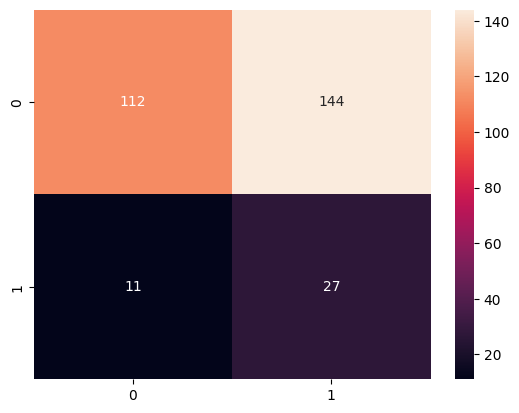

In [415]:
# RBF

model_svm_rbf.fit(X_train_under, y_train_under)

y_pred = model_svm_rbf.predict(X_test)

accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

              precision    recall  f1-score   support

           0       0.92      0.22      0.36       256
           1       0.14      0.87      0.24        38

    accuracy                           0.31       294
   macro avg       0.53      0.55      0.30       294
weighted avg       0.82      0.31      0.34       294



<Axes: >

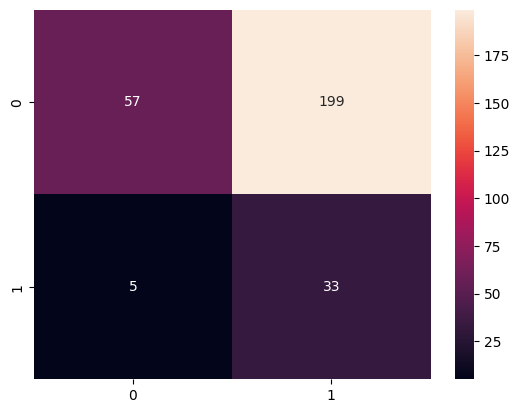

In [416]:
# POLY

model_svm_poly.fit(X_train_under, y_train_under)

y_pred = model_svm_poly.predict(X_test)

accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

### SMOTE

              precision    recall  f1-score   support

           0       0.92      0.48      0.63       256
           1       0.17      0.71      0.27        38

    accuracy                           0.51       294
   macro avg       0.54      0.60      0.45       294
weighted avg       0.82      0.51      0.58       294



<Axes: >

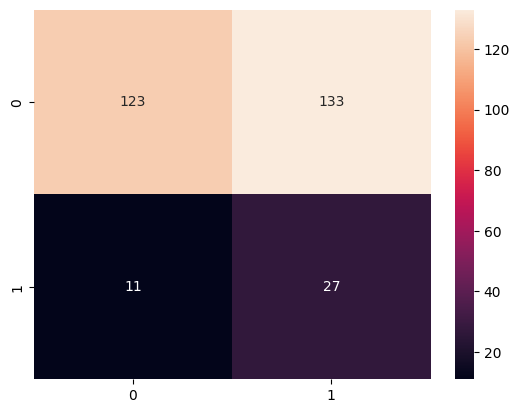

In [417]:
# RBF

model_svm_rbf.fit(X_train_smote, y_train_smote)

y_pred = model_svm_rbf.predict(X_test)

accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

              precision    recall  f1-score   support

           0       0.91      0.23      0.37       256
           1       0.14      0.84      0.24        38

    accuracy                           0.31       294
   macro avg       0.52      0.54      0.31       294
weighted avg       0.81      0.31      0.36       294



<Axes: >

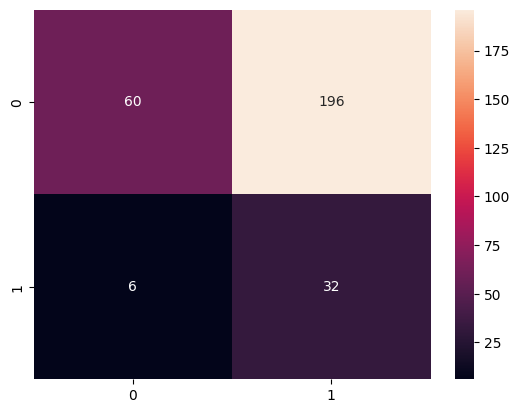

In [418]:
# POLY

model_svm_poly.fit(X_train_smote, y_train_smote)

y_pred = model_svm_poly.predict(X_test)

accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

## KNN

In [419]:
from sklearn.neighbors import KNeighborsClassifier

In [420]:
## MINKOWSKI

knn=KNeighborsClassifier(n_neighbors=5, metric='minkowski')
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)

In [421]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91       256
           1       0.19      0.08      0.11        38

    accuracy                           0.84       294
   macro avg       0.53      0.51      0.51       294
weighted avg       0.79      0.84      0.81       294



<Axes: >

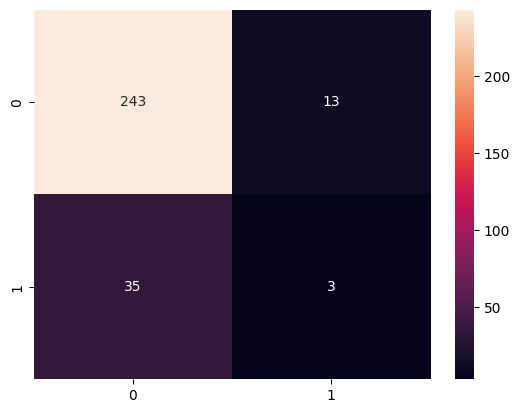

In [422]:
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

In [423]:
## CHEBYSHEV

knn=KNeighborsClassifier(n_neighbors=10, metric='chebyshev')
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)

In [424]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       256
           1       0.33      0.05      0.09        38

    accuracy                           0.86       294
   macro avg       0.60      0.52      0.51       294
weighted avg       0.80      0.86      0.82       294



In [425]:
params={'metric':['minkowski', 'chebyshev', 'manhattan', 'euclidean'], 'n_neighbors':[3,5,7,10]}
knn=KNeighborsClassifier()
searcher=GridSearchCV(knn, params)

In [426]:
searcher.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'chebyshev', 'manhattan',
                                    'euclidean'],
                         'n_neighbors': [3, 5, 7, 10]})

In [427]:
searcher.best_params_

{'metric': 'minkowski', 'n_neighbors': 10}

In [428]:
searcher.best_score_

0.8299314821492967

In [429]:
knn=KNeighborsClassifier(metric='manhattan', n_neighbors= 10)
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=10)

In [430]:
y_pred=knn.predict(X_test)

In [431]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       256
           1       0.00      0.00      0.00        38

    accuracy                           0.86       294
   macro avg       0.43      0.50      0.46       294
weighted avg       0.76      0.86      0.81       294



<Axes: >

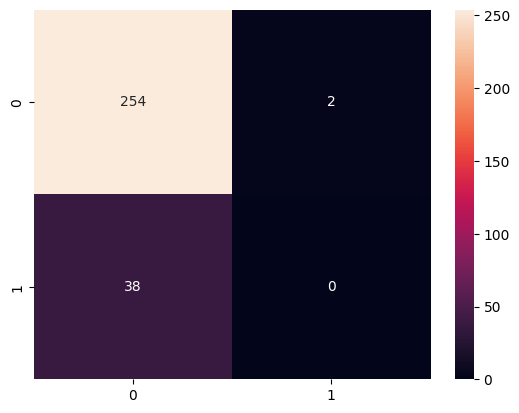

In [432]:
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

### Oversampling

In [433]:
knn=KNeighborsClassifier(metric='manhattan', n_neighbors= 10)
knn.fit(X_train_over, y_train_over)

KNeighborsClassifier(metric='manhattan', n_neighbors=10)

In [434]:
y_pred_over=knn.predict(X_test)

              precision    recall  f1-score   support

           0       0.88      0.61      0.72       256
           1       0.14      0.45      0.22        38

    accuracy                           0.59       294
   macro avg       0.51      0.53      0.47       294
weighted avg       0.79      0.59      0.65       294



<Axes: >

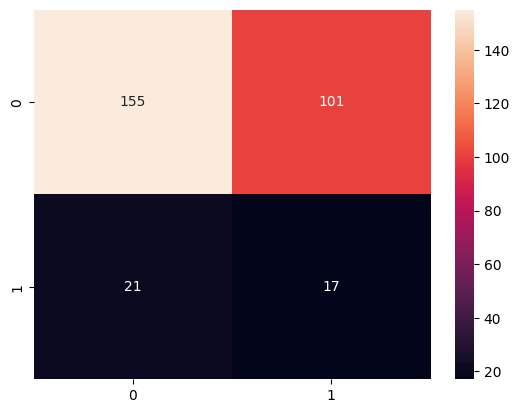

In [435]:
accuracy_score(y_test, y_pred_over)

print(classification_report(y_test, y_pred_over))

cm = confusion_matrix(y_test, y_pred_over)
sns.heatmap(cm, annot=True, fmt='d')

### undersampling

In [436]:
knn=KNeighborsClassifier(metric='manhattan', n_neighbors= 10)
knn.fit(X_train_under, y_train_under)

KNeighborsClassifier(metric='manhattan', n_neighbors=10)

In [437]:
y_pred_under=knn.predict(X_test)

              precision    recall  f1-score   support

           0       0.90      0.67      0.77       256
           1       0.18      0.50      0.27        38

    accuracy                           0.65       294
   macro avg       0.54      0.59      0.52       294
weighted avg       0.81      0.65      0.70       294



<Axes: >

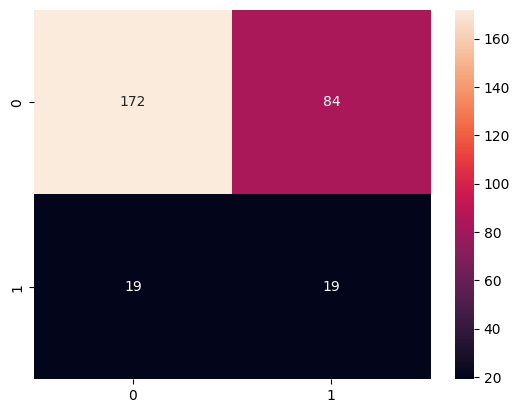

In [438]:
accuracy_score(y_test, y_pred_under)

print(classification_report(y_test, y_pred_under))

cm = confusion_matrix(y_test, y_pred_under)
sns.heatmap(cm, annot=True, fmt='d')

### SMOTE

In [439]:
model = DecisionTreeClassifier()
model.fit(X_train_smote, y_train_smote)


DecisionTreeClassifier()

In [440]:
y_pred_smote = model.predict(X_test)

              precision    recall  f1-score   support

           0       0.91      0.84      0.87       256
           1       0.30      0.47      0.37        38

    accuracy                           0.79       294
   macro avg       0.61      0.65      0.62       294
weighted avg       0.84      0.79      0.81       294



<Axes: >

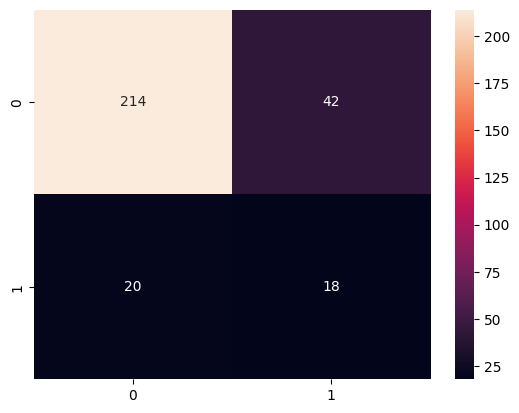

In [441]:

accuracy_score(y_test, y_pred_smote)

print(classification_report(y_test, y_pred_smote))

cm = confusion_matrix(y_test, y_pred_smote)
sns.heatmap(cm, annot=True, fmt='d')

## Naive bayes

In [442]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB

In [443]:
mnb=MultinomialNB()
mnb.fit(X_train, y_train)

y_pred=mnb.predict(X_test)

In [444]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.57      0.70       256
           1       0.17      0.58      0.26        38

    accuracy                           0.57       294
   macro avg       0.53      0.58      0.48       294
weighted avg       0.81      0.57      0.64       294



<Axes: >

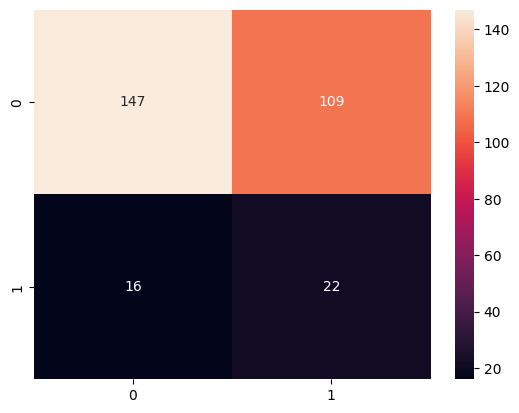

In [445]:
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

### Oversampling

              precision    recall  f1-score   support

           0       0.89      0.86      0.88       256
           1       0.25      0.32      0.28        38

    accuracy                           0.79       294
   macro avg       0.57      0.59      0.58       294
weighted avg       0.81      0.79      0.80       294



<Axes: >

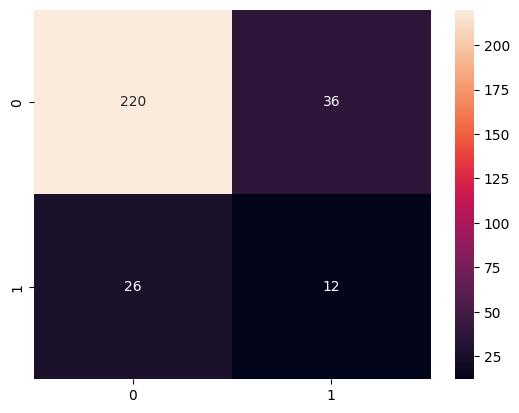

In [446]:
model.fit(X_train_over, y_train_over)

y_pred_over = model.predict(X_test)

accuracy_score(y_test, y_pred_over)

print(classification_report(y_test, y_pred_over))

cm = confusion_matrix(y_test, y_pred_over)
sns.heatmap(cm, annot=True, fmt='d')

### Undersampling

              precision    recall  f1-score   support

           0       0.94      0.65      0.77       256
           1       0.24      0.74      0.36        38

    accuracy                           0.66       294
   macro avg       0.59      0.69      0.57       294
weighted avg       0.85      0.66      0.72       294



<Axes: >

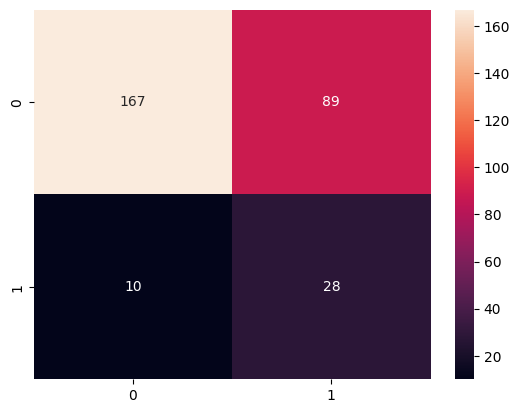

In [447]:
model.fit(X_train_under, y_train_under)

y_pred_under = model.predict(X_test)

accuracy_score(y_test, y_pred_under)

print(classification_report(y_test, y_pred_under))

cm = confusion_matrix(y_test, y_pred_under)
sns.heatmap(cm, annot=True, fmt='d')

### SMOTE

              precision    recall  f1-score   support

           0       0.91      0.82      0.86       256
           1       0.28      0.47      0.35        38

    accuracy                           0.77       294
   macro avg       0.59      0.65      0.61       294
weighted avg       0.83      0.77      0.80       294



<Axes: >

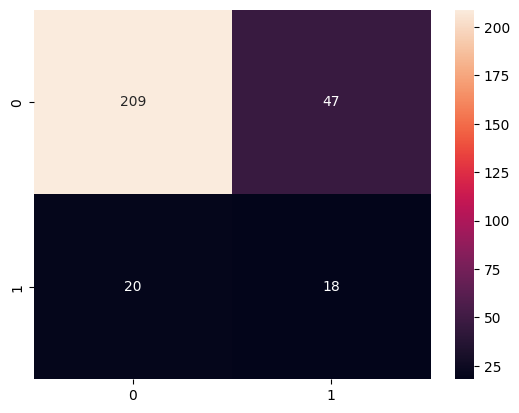

In [448]:
model.fit(X_train_smote, y_train_smote)

y_pred_smote = model.predict(X_test)

accuracy_score(y_test, y_pred_smote)

print(classification_report(y_test, y_pred_smote))

cm = confusion_matrix(y_test, y_pred_smote)
sns.heatmap(cm, annot=True, fmt='d')

## Drzewo decyzyjne 

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       256
           1       0.35      0.39      0.37        38

    accuracy                           0.83       294
   macro avg       0.63      0.64      0.63       294
weighted avg       0.84      0.83      0.83       294



<Axes: >

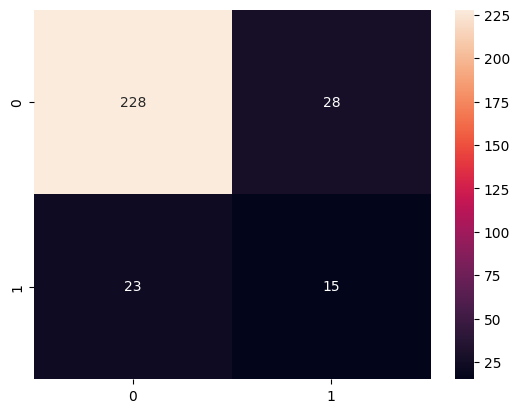

In [449]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

In [450]:
dt.get_depth()

15

In [451]:
dt.get_n_leaves()

145

In [452]:
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

### Oversampling

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       256
           1       0.27      0.34      0.30        38

    accuracy                           0.79       294
   macro avg       0.58      0.60      0.59       294
weighted avg       0.82      0.79      0.80       294



<Axes: >

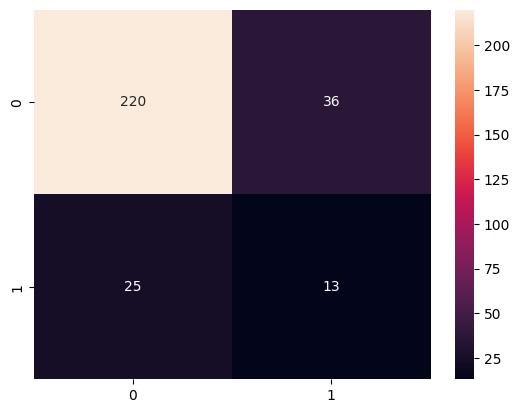

In [453]:

dt = DecisionTreeClassifier()
dt.fit(X_train_over, y_train_over)

y_pred = dt.predict(X_test)

accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

### Undersampling

              precision    recall  f1-score   support

           0       0.94      0.64      0.76       256
           1       0.23      0.71      0.34        38

    accuracy                           0.65       294
   macro avg       0.58      0.67      0.55       294
weighted avg       0.84      0.65      0.70       294



<Axes: >

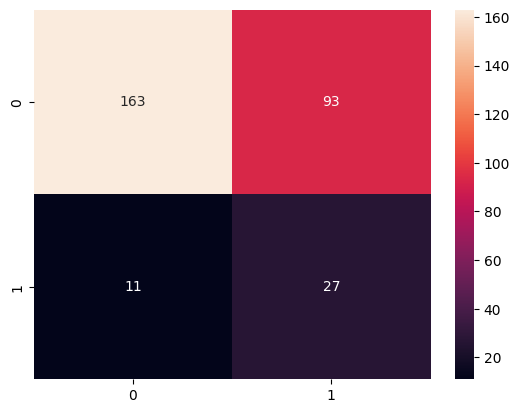

In [454]:
dt = DecisionTreeClassifier()
dt.fit(X_train_under, y_train_under)

y_pred = dt.predict(X_test)

accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

### SMOTE

              precision    recall  f1-score   support

           0       0.91      0.83      0.87       256
           1       0.30      0.47      0.36        38

    accuracy                           0.79       294
   macro avg       0.60      0.65      0.62       294
weighted avg       0.83      0.79      0.81       294



<Axes: >

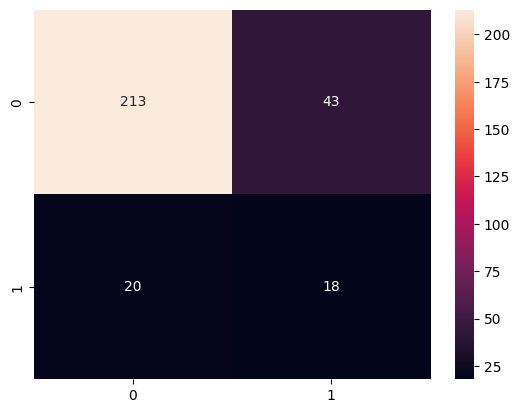

In [455]:

dt = DecisionTreeClassifier()
dt.fit(X_train_smote, y_train_smote)

y_pred = dt.predict(X_test)

accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

###Classweight

              precision    recall  f1-score   support

           0       0.88      0.89      0.88       256
           1       0.19      0.18      0.19        38

    accuracy                           0.80       294
   macro avg       0.54      0.54      0.54       294
weighted avg       0.79      0.80      0.79       294



<Axes: >

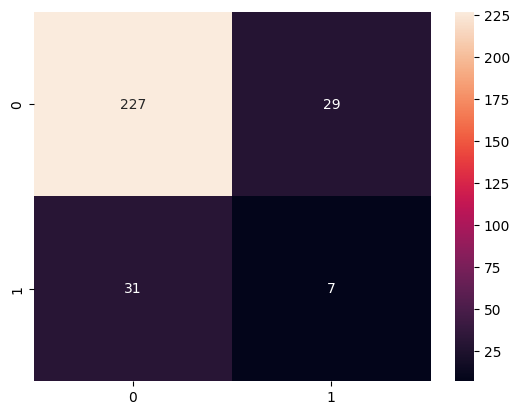

In [456]:

dt = DecisionTreeClassifier(class_weight='balanced')
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

### Zespoły klasyfikatorów

## Bagging

In [457]:
from sklearn.ensemble import BaggingClassifier

bagging_model_dt = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50, random_state=123)

bagging_model_dt.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50,
                  random_state=123)

In [458]:
y_pred_train_bag_dt = bagging_model_dt.predict(X_train)
y_pred_test_bag_dt = bagging_model_dt.predict(X_test)

In [459]:
print(classification_report(y_train, y_pred_train_bag_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       977
           1       1.00      1.00      1.00       199

    accuracy                           1.00      1176
   macro avg       1.00      1.00      1.00      1176
weighted avg       1.00      1.00      1.00      1176



In [460]:
print(classification_report(y_test, y_pred_test_bag_dt))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       256
           1       0.83      0.26      0.40        38

    accuracy                           0.90       294
   macro avg       0.87      0.63      0.67       294
weighted avg       0.89      0.90      0.87       294



In [461]:
bagg_model_svm = BaggingClassifier(base_estimator=SVC(), n_estimators=50, random_state=123)
bagg_model_svm.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=SVC(), n_estimators=50, random_state=123)

In [462]:
y_pred_train = bagg_model_svm.predict(X_train)
y_pred_test = bagg_model_svm.predict(X_test)

In [463]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91       977
           1       0.00      0.00      0.00       199

    accuracy                           0.83      1176
   macro avg       0.42      0.50      0.45      1176
weighted avg       0.69      0.83      0.75      1176



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [464]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       256
           1       0.00      0.00      0.00        38

    accuracy                           0.87       294
   macro avg       0.44      0.50      0.47       294
weighted avg       0.76      0.87      0.81       294



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [465]:
from sklearn.ensemble import RandomForestClassifier

In [466]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=123, max_depth=10)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=123)

In [467]:
y_rf_train = rf_model.predict(X_train)
y_rf_test = rf_model.predict(X_test)

In [468]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91       977
           1       0.00      0.00      0.00       199

    accuracy                           0.83      1176
   macro avg       0.42      0.50      0.45      1176
weighted avg       0.69      0.83      0.75      1176



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [469]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       256
           1       0.00      0.00      0.00        38

    accuracy                           0.87       294
   macro avg       0.44      0.50      0.47       294
weighted avg       0.76      0.87      0.81       294



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [470]:
bagging_model_log = BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=50, random_state=123)
bagging_model_log.fit(X_train, y_train)



/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/

BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=50,
                  random_state=123)

In [471]:
y_pred_train_log = bagging_model_log.predict(X_train)
y_pred_test_log = bagging_model_log.predict(X_test)

In [472]:
print(classification_report(y_train, y_pred_train_log))
print(classification_report(y_test, y_pred_test_log))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91       977
           1       0.73      0.14      0.23       199

    accuracy                           0.85      1176
   macro avg       0.79      0.56      0.57      1176
weighted avg       0.83      0.85      0.80      1176

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       256
           1       1.00      0.18      0.31        38

    accuracy                           0.89       294
   macro avg       0.95      0.59      0.63       294
weighted avg       0.91      0.89      0.86       294



## Boosting

### AdaBoost

In [473]:
from sklearn.ensemble import AdaBoostClassifier

In [474]:
adaboost_model = AdaBoostClassifier(n_estimators=30)
adaboost_model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=30)

In [475]:
y_ada_train = adaboost_model.predict(X_train)
y_ada_test = adaboost_model.predict(X_test)

In [476]:
print(classification_report(y_test, y_ada_test))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       256
           1       0.77      0.53      0.62        38

    accuracy                           0.92       294
   macro avg       0.85      0.75      0.79       294
weighted avg       0.91      0.92      0.91       294



In [477]:
print(classification_report(y_train, y_ada_train))

              precision    recall  f1-score   support

           0       0.90      0.98      0.93       977
           1       0.81      0.44      0.57       199

    accuracy                           0.89      1176
   macro avg       0.85      0.71      0.75      1176
weighted avg       0.88      0.89      0.87      1176



### Gradient Boosting

In [478]:
from sklearn.ensemble import GradientBoostingClassifier

In [479]:
grad_model = GradientBoostingClassifier(n_estimators=100, random_state=123)
grad_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=123)

In [480]:
y_grad_train = grad_model.predict(X_train)
y_grad_test = grad_model.predict(X_test)

In [481]:
print(classification_report(y_test, y_grad_test))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       256
           1       0.68      0.39      0.50        38

    accuracy                           0.90       294
   macro avg       0.80      0.68      0.72       294
weighted avg       0.89      0.90      0.89       294



In [482]:
print(classification_report(y_train, y_grad_train))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       977
           1       0.99      0.70      0.82       199

    accuracy                           0.95      1176
   macro avg       0.97      0.85      0.90      1176
weighted avg       0.95      0.95      0.95      1176



# KRZYWA ROC i cross validate

In [483]:
from sklearn.metrics import RocCurveDisplay


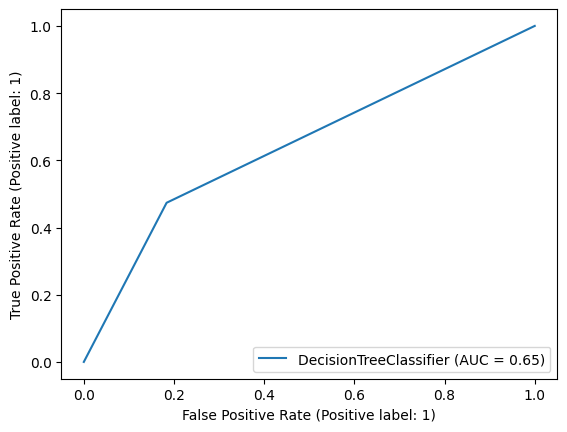

In [484]:
RocCurveDisplay.from_estimator(model, X_test, y_test)

In [485]:
from sklearn.metrics import roc_curve, auc

In [486]:
fpr_grad, tpr_grad,  _= roc_curve(y_test, y_grad_test)
fpr_log, tpr_log, _= roc_curve(y_test, y_pred_log)
fpr_bag, tpr_bag, _= roc_curve(y_test, y_pred_test_bag_dt)
fpr_ada, tpr_ada, _= roc_curve(y_test, y_ada_test)
fpr_bag_log, tpr_bag_log, _= roc_curve(y_test, y_pred_test_log)

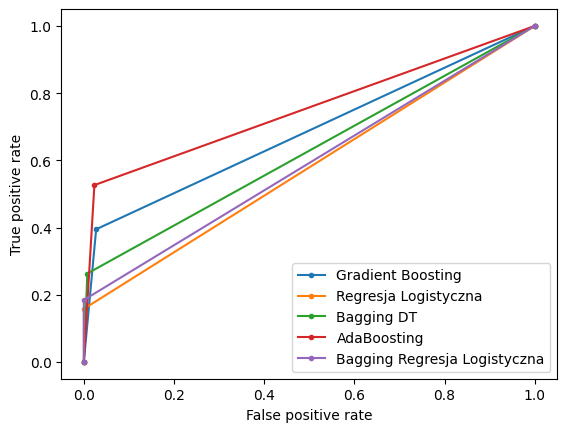

In [487]:
plt.plot(fpr_grad, tpr_grad, marker='.', label='Gradient Boosting')
plt.plot(fpr_log, tpr_log, marker='.', label='Regresja Logistyczna')
plt.plot(fpr_bag, tpr_bag, marker='.', label='Bagging DT')
plt.plot(fpr_ada, tpr_ada, marker='.', label='AdaBoosting')
plt.plot(fpr_bag_log, tpr_bag_log, marker='.', label='Bagging Regresja Logistyczna')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.show()

In [488]:
from sklearn.model_selection import KFold

In [489]:
cv=KFold(n_splits=5, shuffle=True, random_state=123)
                                             
for train, test in cv.split(X,y):
  X_train, y_train= X.iloc[train], y.iloc[train]
  X_test, y_test= X.iloc[test], y.iloc[test]
  print(X_test)

      Age  DailyRate  DistanceFromHome  Education  EmployeeNumber  \
12     31        670                26          1              16   
13     34       1346                19          2              18   
18     53       1219                 2          4              23   
28     44        477                 7          4              36   
31     44       1459                10          4              40   
...   ...        ...               ...        ...             ...   
1448   41        930                 3          3            2037   
1451   38        345                10          2            2041   
1452   50        878                 1          4            2044   
1455   40       1322                 2          4            2048   
1456   35       1199                18          4            2049   

      EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
12                          1       1          31               3         1   
13           